In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

from category_encoders.ordinal import OrdinalEncoder


from imblearn.under_sampling import NearMiss

from sklearn.tree import DecisionTreeClassifier


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score,
                             recall_score,
                             f1_score,
                             confusion_matrix,
                             classification_report,
                             ConfusionMatrixDisplay,
                             mean_absolute_error,
                             accuracy_score,
                             recall_score,
                             f1_score,
                             auc,
                             roc_auc_score, roc_curve, log_loss)



from sklearn.neighbors import (KNeighborsClassifier,
                               RadiusNeighborsClassifier)

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [ ]:
df = pd.read_csv('german_credit.csv')
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,3-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,3-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,3-Feb,unskilled - resident,0 to 2,no,yes,good


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [ ]:
enc = LabelEncoder()
df["status"] = enc.fit_transform(df["status"])
df["credit_history"] = enc.fit_transform(df["credit_history"])
df["purpose"] = enc.fit_transform(df["purpose"])
df["savings"] = enc.fit_transform(df["savings"])
df["employment_duration"] = enc.fit_transform(df["employment_duration"])
df["installment_rate"] = enc.fit_transform(df["installment_rate"])
df["personal_status_sex"] = enc.fit_transform(df["personal_status_sex"])
df["other_debtors"] = enc.fit_transform(df["other_debtors"])
df["present_residence"] = enc.fit_transform(df["present_residence"])
df["property"] = enc.fit_transform(df["property"])
df["other_installment_plans"] = enc.fit_transform(df["other_installment_plans"])
df["housing"] = enc.fit_transform(df["housing"])
df["number_credits"] = enc.fit_transform(df["number_credits"])
df["job"] = enc.fit_transform(df["job"])
df["people_liable"] = enc.fit_transform(df["people_liable"])
df["telephone"] = enc.fit_transform(df["telephone"])
df["foreign_worker"] = enc.fit_transform(df["foreign_worker"])
df["credit_risk"] = enc.fit_transform(df["credit_risk"])
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,3,18,0,2,1049,4,2,2,0,2,...,1,21,1,0,0,1,0,0,0,1
1,3,9,0,5,2799,4,0,1,3,2,...,3,36,1,0,1,1,1,0,0,1
2,0,12,4,8,841,0,1,1,0,2,...,3,23,1,0,0,3,0,0,0,1
3,3,12,0,5,2122,4,0,0,3,2,...,3,39,1,0,1,3,1,0,1,1
4,3,12,0,5,2171,4,0,2,3,2,...,1,38,0,2,1,3,0,0,1,1


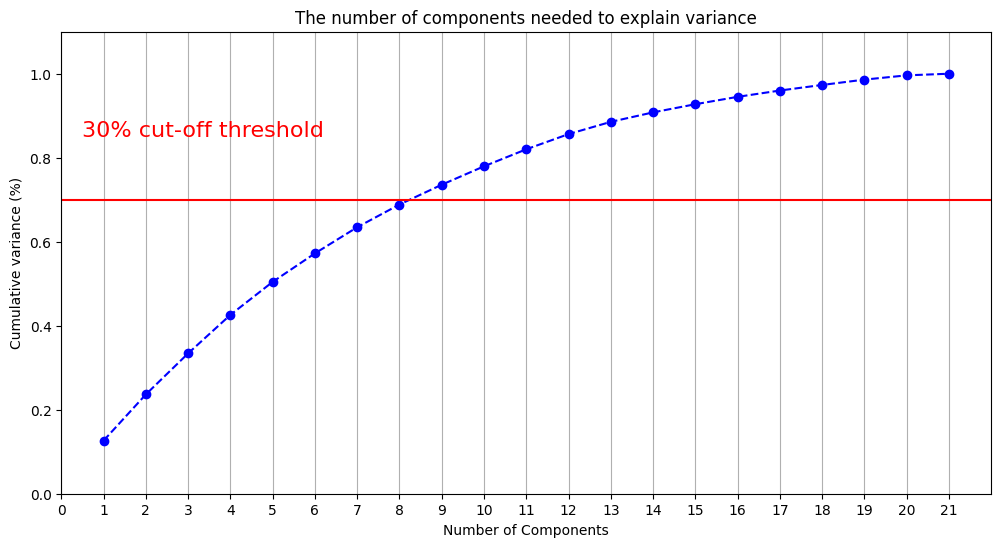

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(df)

pca = PCA(n_components = 0.3)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

pca = PCA().fit(data_rescaled)

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, df.shape[1]+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, df.shape[1]+1, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.7, color='r', linestyle='-')
plt.text(0.5, 0.85, '30% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()